# $$Financial~Analytics: Análise~de~ Credito$$

### $$Conceito:$$



## $$Objetivo:$$  

## $$Verificar~as~variáveis~mais~relevantes~para ~determinar~o ~risco$$$$ que~ um ~cliente~oferece~a~uma~institução~financeira~ao~realizar~operações~financeiras$$

In [1]:
#Carregar os pacotes
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Base de Dados 

In [2]:
# Carrega o dataset
dados = pd.read_csv("dados/dados_historicos.csv",sep=';')
dados

,INDEX,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,SALARIO,CONTA_CLI,HOME_VAL,CASADO,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
0,1,0,0,60,0,11,673.493.816.169.868,No,0,No,...,14230,11,Poupanca,yes,4461,2,No,3,18,Urbano
1,2,0,0,43,0,11,914.492.546.351.364,No,25.725.163.538.943,No,...,14940,1,Poupanca,yes,0,0,No,0,1,Urbano
2,4,0,0,35,1,10,160.385.871.010.253,No,124.190.752.859.313,Yes,...,4010,4,Renda Variavel,no,38690,2,No,3,10,Urbano
3,5,0,0,51,0,14,,No,306.251.380.643.571,Yes,...,15440,7,Poupanca,yes,0,0,No,0,6,Urbano
4,6,0,0,50,0,,114.985.642.811.351,No,243.925.298.096.985,Yes,...,18000,1,Renda Variavel,no,19217,2,Yes,3,17,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,10273,0,0,46,0,10,846.669.540.717.529,No,236.724.605.730.698,Yes,...,35050,1,Tesouro Direto,no,0,0,No,0,7,Urbano
8139,10274,0,0,48,0,12,666.127.214.963.319,No,209.238.624.130.139,Yes,...,16340,6,Renda Variavel,no,0,0,No,0,5,Rural
8140,10275,0,0,56,0,11,129.167.004.028.662,No,,No,...,2790,4,Renda Variavel,no,0,0,No,0,12,Urbano
8141,10278,0,0,35,0,7,648.903.163.188.947,No,0,No,...,7990,8,Renda Variavel,no,0,0,No,1,12,Urbano


**Dataset contém 8.143 registros e 26 variáveis.**

# Dicionário de Dados



### **$$Variáveis:$$**

- **INDEX:** Id do Cliente


- **TARGET_FLAG:** Risco da Transação (1= alto risco e 0 = baixo risco)

    
- **TARGET_AMT:** Custo da transação


- **IDADE:** Idade do Cliente


- **HOMEKIDS:**  Número de filhos do cliente


- **YOJ:** Anos no trabalho atual


- **SALARIO:** Salário do Cliente


- **CONTA_CLI:** O Cliente tem mais que uma conta em banco


- **HOME_VAL:** Valor da casa onde mora.


- **CASADO:** Estado civil


- **SEX:** Gênero
    
    
- **EDUCATION:** Nível educacional do cliente


- **JOB:** Categoria de trabalho
    
    
- **TRAVTIME:** Distancia para o trabalho


- **USO_PROD:** Finalidade do uso do produto financeiro.

    
- **VALOR_SOLICITADO:** Valor solicitado ao banco.


- **TIF:** Tempo de experiencia profissional 


- **TIPO_PROD:** Tipo de produto financeiro


- **PROD_ALTO_VALOR:** Produto financeiro de alto valor


- **OLDCLAIM:** Total da Dívida financeira nos últimos 5 anos.


- **CLM_FREQ:** Total em anos da dívida financeira.


- **TRAN_SUSP:** Se existe transação suspeita detectada


- **TEMPO_CLIENTE:** Tempo como cliente do banco.

    
- **TEMPO_VIDA_PROD:** Prazo para pagar a divida


- **URBANICITY:** Se mora na região urbana ou rural




# Análise Exploratória

In [3]:
#Vamos excluir a variável ID pois ela é inrrelavante para nosso objetivo
dados = dados.drop('INDEX',axis=1)

In [4]:
# Tipos de dados das colunas
dados.dtypes

TARGET_FLAG          int64
TARGET_AMT          object
IDADE               object
HOMEKIDS             int64
YOJ                 object
SALARIO             object
CONTA_CLI           object
HOME_VAL            object
CASADO              object
SEX                 object
EDUCATION           object
JOB                 object
TRAVTIME            object
USO_PROD            object
VALOR_SOLICITADO     int64
TIF                  int64
TIPO_PROD           object
PROD_ALTO_VALOR     object
OLDCLAIM             int64
CLM_FREQ             int64
TRAN_SUSP           object
TEMPO_CLIENTE        int64
TEMPO_VIDA_PROD     object
URBANICITY          object
dtype: object

**Algumas variáveis estão com o tipo de dados errado, temos que transformar os dados de acordo com as características de cada variável**

In [5]:
# Verificar se existe valores nulos
dados.isnull().sum()

TARGET_FLAG         0
TARGET_AMT          0
IDADE               0
HOMEKIDS            0
YOJ                 0
SALARIO             0
CONTA_CLI           0
HOME_VAL            0
CASADO              0
SEX                 0
EDUCATION           0
JOB                 0
TRAVTIME            0
USO_PROD            0
VALOR_SOLICITADO    0
TIF                 0
TIPO_PROD           0
PROD_ALTO_VALOR     0
OLDCLAIM            0
CLM_FREQ            0
TRAN_SUSP           0
TEMPO_CLIENTE       0
TEMPO_VIDA_PROD     0
URBANICITY          0
dtype: int64

In [6]:
#Verificar se existe dados duplicados
sum(dados.duplicated())

0

**Não há valores nulos e nem duplicados**

# Feature engineering

**As variáveis: SALARIO, HOME_VAL e TRAVTIME, estão com valores fora da realidade, vamos transformar em variáveis categoricas dependendo da quantidade de numeros por linha** 

In [7]:
#Criar as colunas 
dados['N_Salario'] = dados["SALARIO"].str.len()
dados['N_HOME_VAL'] = dados["HOME_VAL"].str.len()
dados['N_TRAVTIME'] = dados["TRAVTIME"].str.len()
dados.head(5)

,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,SALARIO,CONTA_CLI,HOME_VAL,CASADO,SEX,...,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY,N_Salario,N_HOME_VAL,N_TRAVTIME
0,0,0,60,0,11,673.493.816.169.868,No,0,No,M,...,yes,4461,2,No,3,18,Urbano,19,1,19
1,0,0,43,0,11,914.492.546.351.364,No,25.725.163.538.943,No,M,...,yes,0,0,No,0,1,Urbano,19,18,19
2,0,0,35,1,10,160.385.871.010.253,No,124.190.752.859.313,Yes,F,...,no,38690,2,No,3,10,Urbano,19,19,1
3,0,0,51,0,14,,No,306.251.380.643.571,Yes,M,...,yes,0,0,No,0,6,Urbano,1,19,19
4,0,0,50,0,,114.985.642.811.351,No,243.925.298.096.985,Yes,F,...,no,19217,2,Yes,3,17,Urbano,19,19,19


**Criamos colunas contando a quantidade de numeros que aparecem nas veriáveis selecionadas** 

In [8]:
#Analise da variável SALARIO
round(dados['N_Salario'].value_counts()/len(dados)*100,2)

19    78.75
1     13.02
18     7.50
17     0.63
15     0.09
13     0.01
Name: N_Salario, dtype: float64

**Poderiamos criar 2 categorias, os numeros com 19 caracteres sendo salario alto e com menos de 19 como baixo, porém temos praticamente 80% dos dados com 19 caracteres e 13% dados com apenas 1 caracter(que neste contexto representa valores não coletados), neste caso é melhor excluir a variável**

In [9]:
round(dados['N_HOME_VAL'].value_counts()/len(dados)*100,2)

19    59.43
1     33.80
18     6.09
17     0.64
15     0.05
Name: N_HOME_VAL, dtype: float64

In [10]:
round(dados['N_TRAVTIME'].value_counts()/len(dados)*100,2)

19    86.52
18     8.74
1      3.83
17     0.80
15     0.10
14     0.01
Name: N_TRAVTIME, dtype: float64

**Note que as variáveis: N_HOME_VAL e N_TRAVTIME segue o mesmo padrão da analise da variável SALARIO, por isso vamos excluir essa variáveis também**

In [11]:
#Exluir as variáveis SALARIO, HOME_VAL , TRAVTIME, N_Salario, N_HOME_VAL e N_TRAVTIME
dados.drop(['SALARIO','HOME_VAL','TRAVTIME','N_Salario','N_HOME_VAL','N_TRAVTIME'],axis=1,inplace=True)
dados.head(3)


,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,CONTA_CLI,CASADO,SEX,EDUCATION,JOB,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
0,0,0,60,0,11,No,No,M,PhD,Profissional,...,14230,11,Poupanca,yes,4461,2,No,3,18,Urbano
1,0,0,43,0,11,No,No,M,Ensino Medio,Trabalho Manual,...,14940,1,Poupanca,yes,0,0,No,0,1,Urbano
2,0,0,35,1,10,No,Yes,F,Ensino Medio,Trabalho Administrativo,...,4010,4,Renda Variavel,no,38690,2,No,3,10,Urbano


**Variáveis: SALARIO, HOME_VAL , TRAVTIME, N_Salario, N_HOME_VAL e N_TRAVTIME, excluidas**

In [12]:
# Verifica o total de valores únicos por coluna
dados.nunique()

TARGET_FLAG            2
TARGET_AMT          1948
IDADE                 61
HOMEKIDS               6
YOJ                   22
CONTA_CLI              2
CASADO                 2
SEX                    2
EDUCATION              5
JOB                    9
USO_PROD               2
VALOR_SOLICITADO    2788
TIF                   23
TIPO_PROD              6
PROD_ALTO_VALOR        2
OLDCLAIM            2851
CLM_FREQ               6
TRAN_SUSP              2
TEMPO_CLIENTE         13
TEMPO_VIDA_PROD       31
URBANICITY             2
dtype: int64

**Analisandos os valores únicos, pela quantidade de classes, podemos adotar que acima de 9 classes as variáveis serão numéricas e abaixo categóricas**

**OBS: Antes de mudar o type das colunas, vamos verificar se há  dados faltantes ou incorretos, para não ter erros na hora de mudar o tipo dos dados**

In [13]:
#Verificar todos os dados preenchidos de cada coluna

for i in dados.columns:
    print(f'\nColuna: {i}, {dados[i].unique()}')


Coluna: TARGET_FLAG, [0 1]

Coluna: TARGET_AMT, ['0' '2946' '4021' ... '3106' '471.115.458.053.381' '3135']

Coluna: IDADE, ['60' '43' '35' '51' '50' '34' '54' '37' '53' '55' '45' '39' '42' '31'
 '28' '48' '47' '44' '33' '32' '40' '49' '52' '41' '56' '38' '63' '59'
 '46' '30' '29' '58' '36' '66' '61' '62' '80' '57' '64' ' ' '25' '27' '26'
 '20' '21' '19' '72' '69' '24' '67' '23' '65' '70' '22' '17' '16' '81'
 '73' '68' '18' '76']

Coluna: HOMEKIDS, [0 1 2 3 4 5]

Coluna: YOJ, ['11' '10' '14' ' ' '12' '7' '5' '0' '13' '9' '17' '8' '15' '16' '6' '18'
 '23' '3' '4' '2' '19' '1']

Coluna: CONTA_CLI, ['No' 'Yes']

Coluna: CASADO, ['No' 'Yes']

Coluna: SEX, ['M' 'F']

Coluna: EDUCATION, ['PhD' 'Ensino Medio' 'Ensino Fundamental' 'Ensino Superior' 'Mestrado']

Coluna: JOB, ['Profissional' 'Trabalho Manual' 'Trabalho Administrativo' 'Medico'
 'Advogado' 'Gerente' ' ' 'Do Lar' 'Estudante']

Coluna: USO_PROD, ['Pessoal' 'Comercial']

Coluna: VALOR_SOLICITADO, [14230 14940  4010 ... 34420 35050 

**Note que há colunas com dados missing e com erros no preenchimento dos dados**

In [14]:
#Excluir os dados preenchidos incorretamente da variável TARGET_AMT
filt = dados['TARGET_AMT'].str.len().to_frame()

#Filtrar somente registros com menos de 6 caracteres
filt = filt[filt.TARGET_AMT<6].index

dados = dados.loc[filt]
dados

,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,CONTA_CLI,CASADO,SEX,EDUCATION,JOB,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
0,0,0,60,0,11,No,No,M,PhD,Profissional,...,14230,11,Poupanca,yes,4461,2,No,3,18,Urbano
1,0,0,43,0,11,No,No,M,Ensino Medio,Trabalho Manual,...,14940,1,Poupanca,yes,0,0,No,0,1,Urbano
2,0,0,35,1,10,No,Yes,F,Ensino Medio,Trabalho Administrativo,...,4010,4,Renda Variavel,no,38690,2,No,3,10,Urbano
3,0,0,51,0,14,No,Yes,M,Ensino Fundamental,Trabalho Manual,...,15440,7,Poupanca,yes,0,0,No,0,6,Urbano
4,0,0,50,0,,No,Yes,F,PhD,Medico,...,18000,1,Renda Variavel,no,19217,2,Yes,3,17,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,0,0,46,0,10,No,Yes,F,Ensino Superior,Trabalho Manual,...,35050,1,Tesouro Direto,no,0,0,No,0,7,Urbano
8139,0,0,48,0,12,No,Yes,F,Ensino Superior,Trabalho Manual,...,16340,6,Renda Variavel,no,0,0,No,0,5,Rural
8140,0,0,56,0,11,No,No,F,Ensino Superior,Estudante,...,2790,4,Renda Variavel,no,0,0,No,0,12,Urbano
8141,0,0,35,0,7,No,No,F,Ensino Superior,Gerente,...,7990,8,Renda Variavel,no,0,0,No,1,12,Urbano


**Excluimos os dados que foram preenchidos incorrentamente da coluna TARGET_AMT**

In [15]:
#Verificar o nome das variáveis com dados faltantes
e = []
for i in dados.columns:
    a =dados[dados[i] == ' '].index.values
    if len(a)>0:
        print(i)
e

IDADE
YOJ
JOB
TEMPO_VIDA_PROD


[]

**Nome das variáveis que há registros faltantes**

In [16]:
#Verificar os indices das variáveis com registro faltantes
e = []
for i in dados.columns:
    a =dados[dados[i] == ' '].index
    if len(a)>0:
        e.append(a)
indices = np.concatenate((e[0], e[1], e[0], e[1]))        

dados_1 = dados.loc[indices]
dados_1.head(5)

,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,CONTA_CLI,CASADO,SEX,EDUCATION,JOB,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
239,1,6142,,2,8,Yes,No,F,Ensino Fundamental,Trabalho Administrativo,...,3100,9,CDB,yes,10099,2,No,4,5,Urbano
1042,1,3092,,3,0,Yes,No,M,Ensino Superior,Estudante,...,1500,10,Poupanca,yes,0,0,No,7,8,Urbano
1314,1,3444,,2,0,Yes,No,F,Ensino Fundamental,Do Lar,...,14500,1,Renda Variavel,yes,0,0,No,0,6,Urbano
2970,1,2541,,2,0,Yes,No,F,Ensino Superior,Do Lar,...,3180,11,CDB,yes,25235,1,Yes,0,13,Urbano
3459,1,5640,,3,12,No,Yes,M,Ensino Medio,Estudante,...,20770,1,Renda Fixa,yes,0,0,No,6,1,Urbano


**Tabela filtrada somente com registro entre aspas: ' '**

In [17]:
e

[Int64Index([239, 1042, 1314, 2970, 3459, 4155], dtype='int64'),
 Int64Index([   4,    6,    7,   45,   53,   54,   70,   76,   82,  115,
             ...
             8071, 8075, 8079, 8081, 8083, 8102, 8111, 8114, 8124, 8132],
            dtype='int64', length=432),
 Int64Index([  13,   31,   36,   60,   63,   64,   88,  114,  118,  167,
             ...
             7977, 7995, 8000, 8013, 8051, 8067, 8091, 8110, 8132, 8133],
            dtype='int64', length=505),
 Int64Index([  44,   48,   64,   68,   80,   83,  101,  102,  119,  143,
             ...
             7978, 7999, 8023, 8025, 8030, 8039, 8043, 8058, 8078, 8085],
            dtype='int64', length=486)]

In [18]:
#Filtrar somente os dados que não contem nulos ou missing
dados_2 = dados[~dados.index.isin(dados_1.index)]
dados_2

,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,CONTA_CLI,CASADO,SEX,EDUCATION,JOB,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
0,0,0,60,0,11,No,No,M,PhD,Profissional,...,14230,11,Poupanca,yes,4461,2,No,3,18,Urbano
1,0,0,43,0,11,No,No,M,Ensino Medio,Trabalho Manual,...,14940,1,Poupanca,yes,0,0,No,0,1,Urbano
2,0,0,35,1,10,No,Yes,F,Ensino Medio,Trabalho Administrativo,...,4010,4,Renda Variavel,no,38690,2,No,3,10,Urbano
3,0,0,51,0,14,No,Yes,M,Ensino Fundamental,Trabalho Manual,...,15440,7,Poupanca,yes,0,0,No,0,6,Urbano
5,1,2946,34,1,12,Yes,No,F,Ensino Superior,Trabalho Manual,...,17430,1,CDB,no,0,0,No,0,7,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,0,0,46,0,10,No,Yes,F,Ensino Superior,Trabalho Manual,...,35050,1,Tesouro Direto,no,0,0,No,0,7,Urbano
8139,0,0,48,0,12,No,Yes,F,Ensino Superior,Trabalho Manual,...,16340,6,Renda Variavel,no,0,0,No,0,5,Rural
8140,0,0,56,0,11,No,No,F,Ensino Superior,Estudante,...,2790,4,Renda Variavel,no,0,0,No,0,12,Urbano
8141,0,0,35,0,7,No,No,F,Ensino Superior,Gerente,...,7990,8,Renda Variavel,no,0,0,No,1,12,Urbano


**Usamos os indices da tabela que tinhas os dados nulos para deletar da tabela original**

In [19]:
#Verificar novamente se há registros nulos
e = []
for i in dados_2.columns:
    a =dados_2[dados_2[i] == ' '].index.values
    if len(a)>0:
        print(i)
e

JOB
TEMPO_VIDA_PROD


[]

**Ainda há 2 colunas com registros nulos, vamos filtrar e remover os indices**

In [20]:
#Verificar novamente se há registros nulos

e = []
for i in dados_2.columns:
    a =dados_2[dados_2[i] == ' '].index
    if len(a)>0:
        e.append(a)
indices = np.concatenate((e[0], e[1]))        

dados_3 = dados_2.loc[indices]
len(dados_3)

940

**Há 940 resgistros nulos ainda**

In [21]:
#Filtrar somente os dados que não contem nulos ou missing
dados_4 = dados_2[~dados_2.index.isin(dados_3.index)]
dados_4

,TARGET_FLAG,TARGET_AMT,IDADE,HOMEKIDS,YOJ,CONTA_CLI,CASADO,SEX,EDUCATION,JOB,...,VALOR_SOLICITADO,TIF,TIPO_PROD,PROD_ALTO_VALOR,OLDCLAIM,CLM_FREQ,TRAN_SUSP,TEMPO_CLIENTE,TEMPO_VIDA_PROD,URBANICITY
0,0,0,60,0,11,No,No,M,PhD,Profissional,...,14230,11,Poupanca,yes,4461,2,No,3,18,Urbano
1,0,0,43,0,11,No,No,M,Ensino Medio,Trabalho Manual,...,14940,1,Poupanca,yes,0,0,No,0,1,Urbano
2,0,0,35,1,10,No,Yes,F,Ensino Medio,Trabalho Administrativo,...,4010,4,Renda Variavel,no,38690,2,No,3,10,Urbano
3,0,0,51,0,14,No,Yes,M,Ensino Fundamental,Trabalho Manual,...,15440,7,Poupanca,yes,0,0,No,0,6,Urbano
5,1,2946,34,1,12,Yes,No,F,Ensino Superior,Trabalho Manual,...,17430,1,CDB,no,0,0,No,0,7,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,0,0,46,0,10,No,Yes,F,Ensino Superior,Trabalho Manual,...,35050,1,Tesouro Direto,no,0,0,No,0,7,Urbano
8139,0,0,48,0,12,No,Yes,F,Ensino Superior,Trabalho Manual,...,16340,6,Renda Variavel,no,0,0,No,0,5,Rural
8140,0,0,56,0,11,No,No,F,Ensino Superior,Estudante,...,2790,4,Renda Variavel,no,0,0,No,0,12,Urbano
8141,0,0,35,0,7,No,No,F,Ensino Superior,Gerente,...,7990,8,Renda Variavel,no,0,0,No,1,12,Urbano


**Removemos os registro nulos da tabela original**s

In [22]:
#Verificar novamente se há registros nulos
e = []
for i in dados_4.columns:
    a =dados_4[dados_4[i] == ' '].index.values
    if len(a)>0:
        print(i)
e

[]

**Note que agora não há nenhum registro nulo na tabela**

In [23]:
#Transformar as variáveis no seu type correto

#Filtrar as variáveis float
tran_float = dados_4.nunique()
tran_float = tran_float.to_frame()
tran_float = tran_float[tran_float[0]>9].index

#Filtrar as variáveis object
tran_ob = dados_4.nunique()
tran_ob = tran_ob.to_frame()
tran_ob = tran_ob[tran_ob[0]<=9].index

#Transformar as variáveis em float 
tran_float = dados_4[tran_float]
tran_float = tran_float.astype(float)

#Transformar as variáveis em object
tran_ob = dados_4[tran_ob]
tran_ob = tran_ob.astype(object)

#Unir as 2 variáveis
dados_5 = tran_float.join(tran_ob)



In [24]:
# Verifica as variáveis unicas e comparar com os types
d_type = dados_5.nunique().to_frame()
d_type['dtype'] = dados_5.dtypes
d_type

,0,dtype
TARGET_AMT,1342,float64
IDADE,60,float64
YOJ,21,float64
VALOR_SOLICITADO,2489,float64
TIF,23,float64
OLDCLAIM,2209,float64
TEMPO_CLIENTE,13,float64
TEMPO_VIDA_PROD,30,float64
TARGET_FLAG,2,object
HOMEKIDS,6,object


**Todas as variáveis estão com o type corretamente definido**

In [25]:
#Verificar se há resgistros negativos
e = []
for i in dados_5.columns:
    try:
        a =dados_5[dados_5[i] <0].index
        if len(a)>0:
            valor_negativo = a
            print(i)
    except: continue


TEMPO_VIDA_PROD


**A Variavel TEMPO_VIDA_PROD possui valores negativos**

In [26]:
#Deletar os indices dos valores negativos
dados_5 = dados_5[~dados_5.index.isin(valor_negativo)]

In [27]:
# Verificar se existe valores nulos
dados_5.isnull().sum()

TARGET_AMT          0
IDADE               0
YOJ                 0
VALOR_SOLICITADO    0
TIF                 0
OLDCLAIM            0
TEMPO_CLIENTE       0
TEMPO_VIDA_PROD     0
TARGET_FLAG         0
HOMEKIDS            0
CONTA_CLI           0
CASADO              0
SEX                 0
EDUCATION           0
JOB                 0
USO_PROD            0
TIPO_PROD           0
PROD_ALTO_VALOR     0
CLM_FREQ            0
TRAN_SUSP           0
URBANICITY          0
dtype: int64

**Dataset sem dados nulos**

In [28]:
#Dataset tratado
dados_5

,TARGET_AMT,IDADE,YOJ,VALOR_SOLICITADO,TIF,OLDCLAIM,TEMPO_CLIENTE,TEMPO_VIDA_PROD,TARGET_FLAG,HOMEKIDS,...,CASADO,SEX,EDUCATION,JOB,USO_PROD,TIPO_PROD,PROD_ALTO_VALOR,CLM_FREQ,TRAN_SUSP,URBANICITY
0,0.0,60.0,11.0,14230.0,11.0,4461.0,3.0,18.0,0,0,...,No,M,PhD,Profissional,Pessoal,Poupanca,yes,2,No,Urbano
1,0.0,43.0,11.0,14940.0,1.0,0.0,0.0,1.0,0,0,...,No,M,Ensino Medio,Trabalho Manual,Comercial,Poupanca,yes,0,No,Urbano
2,0.0,35.0,10.0,4010.0,4.0,38690.0,3.0,10.0,0,1,...,Yes,F,Ensino Medio,Trabalho Administrativo,Pessoal,Renda Variavel,no,2,No,Urbano
3,0.0,51.0,14.0,15440.0,7.0,0.0,0.0,6.0,0,0,...,Yes,M,Ensino Fundamental,Trabalho Manual,Pessoal,Poupanca,yes,0,No,Urbano
5,2946.0,34.0,12.0,17430.0,1.0,0.0,0.0,7.0,1,1,...,No,F,Ensino Superior,Trabalho Manual,Comercial,CDB,no,0,No,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,0.0,46.0,10.0,35050.0,1.0,0.0,0.0,7.0,0,0,...,Yes,F,Ensino Superior,Trabalho Manual,Comercial,Tesouro Direto,no,0,No,Urbano
8139,0.0,48.0,12.0,16340.0,6.0,0.0,0.0,5.0,0,0,...,Yes,F,Ensino Superior,Trabalho Manual,Comercial,Renda Variavel,no,0,No,Rural
8140,0.0,56.0,11.0,2790.0,4.0,0.0,0.0,12.0,0,0,...,No,F,Ensino Superior,Estudante,Comercial,Renda Variavel,no,0,No,Urbano
8141,0.0,35.0,7.0,7990.0,8.0,0.0,1.0,12.0,0,0,...,No,F,Ensino Superior,Gerente,Pessoal,Renda Variavel,no,0,No,Urbano


**Dados tratados com 6449 linhas e 21 colunas**

## Análise das variáveis:

**Variavel Target: TARGET_FLAG**

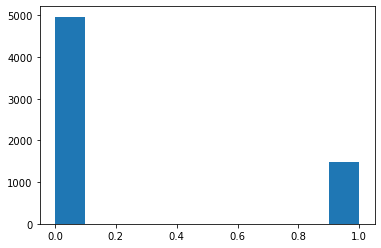

In [29]:
#Plot
plt.hist(dados_5.TARGET_FLAG);

In [30]:
a = len(dados_5[dados_5.TARGET_FLAG==0])
b = len(dados_5[dados_5.TARGET_FLAG==1])
total = len(dados_5)

print(f'Porcentagem de Clientes de Baixo Risco: {round(a/total*100,2)}%')
print(f'Porcentagem de Clientes de Alto Risco: {round(b/total*100,2)}%')

Porcentagem de Clientes de Baixo Risco: 76.99%
Porcentagem de Clientes de Alto Risco: 23.01%


**Claramente temos um problema com a distribuições das classes, esse desbalanceamento faz com que não tenhamos tanta precisão nas previsões dos dados em uma das classes, vamos ter que usar a técnica de sub amostragem para equilibrar os dados**

## Análise dos dados numéricos VS variável target

# OBS: Note que todas as variáveis Numericas tem siginificancia estatistica no teste de Mann-Whitney

In [82]:
#Selecionar as variáveis numericas
import warnings
warnings.filterwarnings('ignore')
var_num = dados_5.select_dtypes(['float','int']).columns
var_num = dados_5[var_num]

#Adicionar a variavel target para analise
var_num['TARGET_FLAG'] = dados_5['TARGET_FLAG']

var_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 8142
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_AMT        6449 non-null   float64
 1   IDADE             6449 non-null   float64
 2   YOJ               6449 non-null   float64
 3   VALOR_SOLICITADO  6449 non-null   float64
 4   TIF               6449 non-null   float64
 5   OLDCLAIM          6449 non-null   float64
 6   TEMPO_CLIENTE     6449 non-null   float64
 7   TEMPO_VIDA_PROD   6449 non-null   float64
 8   TARGET_FLAG       6449 non-null   object 
dtypes: float64(8), object(1)
memory usage: 503.8+ KB


In [32]:
#Teste de Shapiro, verificar se as variáveis tem distribuição normal
import scipy.stats as stats
for i in var_num.columns:
    shapiro_stats, shapiro_p_valor = stats.shapiro(var_num[i][0:500])
    if shapiro_p_valor > 0.05:
        print(f'\nVariável:{i}, P_valor:{shapiro_p_valor:.2f}, Maior que 0.05 ,Tem Distribuiçao Normal')
    else:
        print(f'\nVariável:**{i}**, P_valor:{shapiro_p_valor:.2f}, Não tem distribuição normal')


Variável:**TARGET_AMT**, P_valor:0.00, Não tem distribuição normal

Variável:IDADE, P_valor:0.08, Maior que 0.05 ,Tem Distribuiçao Normal

Variável:**YOJ**, P_valor:0.00, Não tem distribuição normal

Variável:**VALOR_SOLICITADO**, P_valor:0.00, Não tem distribuição normal

Variável:**TIF**, P_valor:0.00, Não tem distribuição normal

Variável:**OLDCLAIM**, P_valor:0.00, Não tem distribuição normal

Variável:**TEMPO_CLIENTE**, P_valor:0.00, Não tem distribuição normal

Variável:**TEMPO_VIDA_PROD**, P_valor:0.00, Não tem distribuição normal

Variável:**TARGET_FLAG**, P_valor:0.00, Não tem distribuição normal


**Apenas a variável IDADE tem distribuição normal, vamos analisar as médias dos dados usando teste não-parametrico de Mann-Whitney**

### TARGET_AMT

In [33]:
#classe 0
classe_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = classe_0['TARGET_AMT'].mean()

#Classe 1
classe_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = classe_1['TARGET_AMT'].mean()


print(f'\nClasse 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')


Classe 0 = 0.0
Classe 1 = 4046.1


In [34]:
#Desvio padrão
np.std(var_num['TARGET_AMT'])

1929.416710810229

In [35]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu
mannwhitneyu(classe_0['TARGET_AMT'], classe_1['TARGET_AMT'], alternative = 'two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

### IDADE

In [36]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['IDADE'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['IDADE'].mean()

print(f'\nClasse 0 = {round(a,2)}')
print(f'Classe 1 = {round(b,2)}')


Classe 0 = 45.2
Classe 1 = 43.04


In [37]:
#Desvio padrão
np.std(var_num['IDADE'])

8.605543070246028

In [38]:
#Verificar há diferença estatistica entre as 2 médias
from scipy.stats import bartlett
stats , p_value = bartlett(target_flag_0['IDADE'], target_flag_1['IDADE'])
print(stats)
print(f'P_valor: {round(p_value,5)}')

61.18603245036376
P_valor: 0.0


### YOJ

In [39]:
#classe 0

target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['YOJ'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['YOJ'].mean()



print(f'\nMédia Classe 0 = {round(a,2)}')
print(f'Média Classe 1 = {round(b,2)}')





Média Classe 0 = 10.64
Média Classe 1 = 9.98


In [40]:
#Desvio padrão
np.std(var_num['YOJ'])

4.139147665532885

In [41]:
#Teste de Mann-Whitney
mannwhitneyu(target_flag_0['YOJ'],target_flag_1['YOJ'], alternative = 'two-sided')

MannwhitneyuResult(statistic=3948784.0, pvalue=2.3309115463937256e-05)

### VALOR_SOLICITADO

In [42]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['VALOR_SOLICITADO'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['VALOR_SOLICITADO'].mean()

print(f'Classe 0 = {round(a,1)}')
print(f'Classe 1 = {round(b,1)}')

Classe 0 = 15645.1
Classe 1 = 13801.3


In [43]:
#Desvio padrão
np.std(var_num['VALOR_SOLICITADO'])

8029.000924371634

In [44]:
mannwhitneyu(target_flag_0['VALOR_SOLICITADO'],target_flag_1['VALOR_SOLICITADO'], alternative = 'two-sided')

MannwhitneyuResult(statistic=4235040.5, pvalue=2.026623013365295e-18)

### TIF

In [45]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['TIF'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['TIF'].mean()

print(f'Classe 0 = {round(a,1)}')
print(f'Classe 1 = {round(b,1)}')

Classe 0 = 5.5
Classe 1 = 4.8


In [46]:
#Desvio padrão
np.std(var_num['TIF'])

4.154609722227253

In [47]:
#Teste de Mann-Whitney
mannwhitneyu(target_flag_0['TIF'],target_flag_1['TIF'], alternative = 'two-sided')

MannwhitneyuResult(statistic=4060870.5, pvalue=1.0123582842083887e-09)

### OLDCLAIM

In [48]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['OLDCLAIM'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['OLDCLAIM'].mean()

print(f'Classe 0 = {round(a,1)}')
print(f'Classe 1 = {round(b,1)}')

Classe 0 = 3263.7
Classe 1 = 5932.6


In [49]:
#Desvio padrão
np.std(var_num['OLDCLAIM'])

8680.866853001635

In [50]:
#Teste de Mann-Whitney
mannwhitneyu(target_flag_0['OLDCLAIM'],target_flag_1['OLDCLAIM'], alternative = 'two-sided')

MannwhitneyuResult(statistic=2663401.0, pvalue=2.5691606418612143e-78)

### TEMPO_CLIENTE

In [51]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['TEMPO_CLIENTE'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['TEMPO_CLIENTE'].mean()

print(f'Classe 0 = {round(a,1)}')
print(f'Classe 1 = {round(b,1)}')

Classe 0 = 1.4
Classe 1 = 2.5


In [52]:
#Desvio padrão
np.std(var_num['TEMPO_CLIENTE'])

2.1152049368906374

In [53]:
#Teste de Mann-Whitney
mannwhitneyu(target_flag_0['TEMPO_CLIENTE'],target_flag_1['TEMPO_CLIENTE'], alternative = 'two-sided')

MannwhitneyuResult(statistic=2789663.5, pvalue=5.465159637618001e-51)

### TEMPO_VIDA_PROD

In [54]:
#classe 0
target_flag_0 = var_num.loc[(var_num['TARGET_FLAG']==0)]
a = target_flag_0['TEMPO_VIDA_PROD'].mean()

#Classe 1
target_flag_1 = var_num.loc[(var_num['TARGET_FLAG']==1)]
b = target_flag_1['TEMPO_VIDA_PROD'].mean()

print(f'Classe 0 = {round(a,1)}')
print(f'Classe 1 = {round(b,1)}')

Classe 0 = 8.3
Classe 1 = 7.0


In [55]:
#Desvio padrão
np.std(var_num['TEMPO_VIDA_PROD'])

5.573568006419385

In [56]:
#Teste de Mann-Whitney
mannwhitneyu(target_flag_0['TEMPO_VIDA_PROD'],target_flag_1['TEMPO_VIDA_PROD'], alternative = 'two-sided')

MannwhitneyuResult(statistic=4157275.0, pvalue=2.98669269595525e-14)

## Analise dos dados Categoricas X Target

**Vamos considerar as porcentagens nas analises 74% para classe 0 e 26% para classe 1**

# OBS: Note que todas as variáveis Categoricas não tem siginificancia estatistica no teste de Mann-Whitney

In [57]:
#Selecionar as variáveis numericas
var_cat = dados_5.select_dtypes(['object']).columns
var_cat = dados_5[var_cat]
var_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 8142
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TARGET_FLAG      6449 non-null   object
 1   HOMEKIDS         6449 non-null   object
 2   CONTA_CLI        6449 non-null   object
 3   CASADO           6449 non-null   object
 4   SEX              6449 non-null   object
 5   EDUCATION        6449 non-null   object
 6   JOB              6449 non-null   object
 7   USO_PROD         6449 non-null   object
 8   TIPO_PROD        6449 non-null   object
 9   PROD_ALTO_VALOR  6449 non-null   object
 10  CLM_FREQ         6449 non-null   object
 11  TRAN_SUSP        6449 non-null   object
 12  URBANICITY       6449 non-null   object
dtypes: object(13)
memory usage: 705.4+ KB


### HOMEKIDS

In [58]:
HOMEKIDS = pd.crosstab(var_cat.TARGET_FLAG,var_cat.HOMEKIDS)
HOMEKIDS/HOMEKIDS.aggregate(np.sum)

HOMEKIDS,0,1,2,3,4,5
TARGET_FLAG,,,,,,
0,0.807047,0.707627,0.702273,0.696691,0.691729,0.666667
1,0.192953,0.292373,0.297727,0.303309,0.308271,0.333333


In [59]:
#Teste de Mann-Whitney 
_,p1 = mannwhitneyu(HOMEKIDS[0][0],HOMEKIDS[0][1], alternative = 'two-sided')
_,p2 = mannwhitneyu(HOMEKIDS[1][0],HOMEKIDS[1][1], alternative = 'two-sided')
_,p3 = mannwhitneyu(HOMEKIDS[2][0],HOMEKIDS[2][1], alternative = 'two-sided')
_,p4 = mannwhitneyu(HOMEKIDS[3][0],HOMEKIDS[3][1], alternative = 'two-sided')
_,p5 = mannwhitneyu(HOMEKIDS[4][0],HOMEKIDS[4][1], alternative = 'two-sided')

print(f'Numero de filho 1: P_valor {p1}')
print(f'Numero de filho 2: P_valor {p2}')
print(f'Numero de filho 3: P_valor {p3}')
print(f'Numero de filho 4: P_valor {p4}')
print(f'Numero de filho 5: P_valor {p5}')

Numero de filho 1: P_valor 1.0
Numero de filho 2: P_valor 1.0
Numero de filho 3: P_valor 1.0
Numero de filho 4: P_valor 1.0
Numero de filho 5: P_valor 1.0


### CONTA_CLI

In [60]:
CONTA_CLI = pd.crosstab(dados.TARGET_FLAG,dados.CONTA_CLI)
CONTA_CLI/CONTA_CLI.aggregate(np.sum)

CONTA_CLI,No,Yes
TARGET_FLAG,,
0,0.791924,0.609359
1,0.208076,0.390641


In [61]:
_,p1 = mannwhitneyu(CONTA_CLI.iloc[0,0],CONTA_CLI.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(CONTA_CLI.iloc[1,0],CONTA_CLI.iloc[1,1], alternative = 'two-sided')

print(f'Cliente possui apenas 1 conta em banco: P_Valor {p1}')
print(f'Cliente possui mais de 1 conta em banco: P_Valor {p2}')

Cliente possui apenas 1 conta em banco: P_Valor 1.0
Cliente possui mais de 1 conta em banco: P_Valor 1.0


### CASADO

In [62]:
CASADO = pd.crosstab(dados.TARGET_FLAG,dados.CASADO)
CASADO/CASADO.aggregate(np.sum)

CASADO,No,Yes
TARGET_FLAG,,
0,0.703812,0.811177
1,0.296188,0.188823


In [63]:
_,p1 = mannwhitneyu(CASADO.iloc[0,0],CASADO.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(CASADO.iloc[1,0],CASADO.iloc[1,1], alternative = 'two-sided')

print(f'Cliente não casado: P_Valor {p1}')
print(f'Cliente asado: P_Valor {p2}')

Cliente não casado: P_Valor 1.0
Cliente asado: P_Valor 1.0


### SEX

In [64]:
SEX = pd.crosstab(dados.TARGET_FLAG,dados.SEX)
SEX/SEX.aggregate(np.sum)

SEX,F,M
TARGET_FLAG,,
0,0.760661,0.778392
1,0.239339,0.221608


In [65]:
_,p1 = mannwhitneyu(SEX.iloc[0,0],SEX.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(SEX.iloc[1,0],SEX.iloc[1,1], alternative = 'two-sided')

print(f'Sexo Feminino, P_valor {p1}')
print(f'Sexo Masculino, P_valor {p2}')

Sexo Feminino, P_valor 1.0
Sexo Masculino, P_valor 1.0


### EDUCATION

In [66]:
EDUCATION = pd.crosstab(dados.TARGET_FLAG,dados.EDUCATION)
EDUCATION/EDUCATION.aggregate(np.sum)

EDUCATION,Ensino Fundamental,Ensino Medio,Ensino Superior,Mestrado,PhD
TARGET_FLAG,,,,,
0,0.718805,0.700366,0.795265,0.824953,0.853693
1,0.281195,0.299634,0.204735,0.175047,0.146307


In [67]:
#Teste de Mann-Whitney 
_,p1 = mannwhitneyu(EDUCATION.loc[0][0],EDUCATION.loc[1][0], alternative = 'two-sided')
_,p2 = mannwhitneyu(EDUCATION.loc[0][1],EDUCATION.loc[1][1], alternative = 'two-sided')
_,p3 = mannwhitneyu(EDUCATION.loc[0][2],EDUCATION.loc[1][2], alternative = 'two-sided')
_,p4 = mannwhitneyu(EDUCATION.loc[0][3],EDUCATION.loc[1][3], alternative = 'two-sided')
_,p5 = mannwhitneyu(EDUCATION.loc[0][4],EDUCATION.loc[1][4], alternative = 'two-sided')

print(f'Ensino Fundamental: P_valor {p1}')
print(f'Ensino Medio: P_valor {p2}')
print(f'Ensino Superior: P_valor {p3}')
print(f'Mestrado: P_valor {p4}')
print(f'PhD: P_valor {p5}')

Ensino Fundamental: P_valor 1.0
Ensino Medio: P_valor 1.0
Ensino Superior: P_valor 1.0
Mestrado: P_valor 1.0
PhD: P_valor 1.0


### JOB

In [68]:
JOB = pd.crosstab(dados.TARGET_FLAG,dados.JOB)
JOB/JOB.aggregate(np.sum)

JOB,,Advogado,Do Lar,Estudante,Gerente,Medico,Profissional,Trabalho Administrativo,Trabalho Manual
TARGET_FLAG,,,,,,,,,
0,0.770297,0.835583,0.757825,0.660714,0.878756,0.9,0.809701,0.743377,0.695143
1,0.229703,0.164417,0.242175,0.339286,0.121244,0.1,0.190299,0.256623,0.304857


In [69]:
#Teste de Mann-Whitney 
_,p1 = mannwhitneyu(JOB.loc[0][0],JOB.loc[1][0], alternative = 'two-sided')
_,p2 = mannwhitneyu(JOB.loc[0][1],JOB.loc[1][1], alternative = 'two-sided')
_,p3 = mannwhitneyu(JOB.loc[0][2],JOB.loc[1][2], alternative = 'two-sided')
_,p4 = mannwhitneyu(JOB.loc[0][3],JOB.loc[1][3], alternative = 'two-sided')
_,p5 = mannwhitneyu(JOB.loc[0][4],JOB.loc[1][4], alternative = 'two-sided')
_,p6 = mannwhitneyu(JOB.loc[0][5],JOB.loc[1][5], alternative = 'two-sided')
_,p7 = mannwhitneyu(JOB.loc[0][6],JOB.loc[1][6], alternative = 'two-sided')
_,p8 = mannwhitneyu(JOB.loc[0][7],JOB.loc[1][7], alternative = 'two-sided')

print(f'Advogado: P_valor {p1}')
print(f'Do Lar: P_valor {p2}')
print(f'Estudante: P_valor {p3}')
print(f'Gerente: P_valor {p4}')
print(f'Medico: P_valor {p5}')
print(f'Profissional: P_valor {p6}')
print(f'Trabalho Administrativo: P_valor {p7}')
print(f'Trabalho Manual: P_valor {p8}')

Advogado: P_valor 1.0
Do Lar: P_valor 1.0
Estudante: P_valor 1.0
Gerente: P_valor 1.0
Medico: P_valor 1.0
Profissional: P_valor 1.0
Trabalho Administrativo: P_valor 1.0
Trabalho Manual: P_valor 1.0


### USO_PROD

In [70]:
USO_PROD = pd.crosstab(dados.TARGET_FLAG,dados.USO_PROD)
USO_PROD/USO_PROD.aggregate(np.sum)

USO_PROD,Comercial,Pessoal
TARGET_FLAG,,
0,0.692227,0.813247
1,0.307773,0.186753


In [71]:
_,p1 = mannwhitneyu(USO_PROD.iloc[0,0],USO_PROD.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(USO_PROD.iloc[1,0],USO_PROD.iloc[1,1], alternative = 'two-sided')

print(f'Produto Comercial, P_valor {p1}')
print(f'Produto Pessoal, P_valor {p2}')

Produto Comercial, P_valor 1.0
Produto Pessoal, P_valor 1.0


### TIPO_PROD

In [72]:
TIPO_PROD = pd.crosstab(dados.TARGET_FLAG,dados.TIPO_PROD)
TIPO_PROD/TIPO_PROD.aggregate(np.sum)

TIPO_PROD,CDB,Criptomeda,Poupanca,Renda Fixa,Renda Variavel,Tesouro Direto
TARGET_FLAG,,,,,,
0,0.700935,0.716781,0.858102,0.769339,0.742188,0.766615
1,0.299065,0.283219,0.141898,0.230661,0.257812,0.233385


In [73]:
#Teste de Mann-Whitney 
_,p1 = mannwhitneyu(TIPO_PROD.loc[0][0],TIPO_PROD.loc[1][0], alternative = 'two-sided')
_,p2 = mannwhitneyu(TIPO_PROD.loc[0][1],TIPO_PROD.loc[1][1], alternative = 'two-sided')
_,p3 = mannwhitneyu(TIPO_PROD.loc[0][2],TIPO_PROD.loc[1][2], alternative = 'two-sided')
_,p4 = mannwhitneyu(TIPO_PROD.loc[0][3],TIPO_PROD.loc[1][3], alternative = 'two-sided')
_,p5 = mannwhitneyu(TIPO_PROD.loc[0][4],TIPO_PROD.loc[1][4], alternative = 'two-sided')
_,p6 = mannwhitneyu(TIPO_PROD.loc[0][5],TIPO_PROD.loc[1][5], alternative = 'two-sided')


print(f'CDB: P_valor {p1}')
print(f'Criptomeda: P_valor {p2}')
print(f'Poupanca: P_valor {p3}')
print(f'Renda Fixa: P_valor {p4}')
print(f'Renda Variavel: P_valor {p5}')
print(f'Tesouro Direto: P_valor {p6}')


CDB: P_valor 1.0
Criptomeda: P_valor 1.0
Poupanca: P_valor 1.0
Renda Fixa: P_valor 1.0
Renda Variavel: P_valor 1.0
Tesouro Direto: P_valor 1.0


### PROD_ALTO_VALOR

In [74]:
PROD_ALTO_VALOR = pd.crosstab(dados.TARGET_FLAG,dados.PROD_ALTO_VALOR)
PROD_ALTO_VALOR/PROD_ALTO_VALOR.aggregate(np.sum)

PROD_ALTO_VALOR,no,yes
TARGET_FLAG,,
0,0.766528,0.774648
1,0.233472,0.225352


In [75]:
_,p1 = mannwhitneyu(PROD_ALTO_VALOR.iloc[0,0],PROD_ALTO_VALOR.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(PROD_ALTO_VALOR.iloc[1,0],PROD_ALTO_VALOR.iloc[1,1], alternative = 'two-sided')

print(f'Produto de Baixo Valor, P_valor {p1}')
print(f'Produto de Alto Valor, P_valor {p2}')

Produto de Baixo Valor, P_valor 1.0
Produto de Alto Valor, P_valor 1.0


### CLM_FREQ

In [76]:
CLM_FREQ = pd.crosstab(dados.TARGET_FLAG,dados.CLM_FREQ)
CLM_FREQ/CLM_FREQ.aggregate(np.sum)

CLM_FREQ,0,1,2,3,4,5
TARGET_FLAG,,,,,,
0,0.84487,0.648247,0.641026,0.640669,0.643275,0.647059
1,0.15513,0.351753,0.358974,0.359331,0.356725,0.352941


In [77]:
#Teste de Mann-Whitney 
_,p1 = mannwhitneyu(CLM_FREQ.loc[0][0],CLM_FREQ.loc[1][0], alternative = 'two-sided')
_,p2 = mannwhitneyu(CLM_FREQ.loc[0][1],CLM_FREQ.loc[1][1], alternative = 'two-sided')
_,p3 = mannwhitneyu(CLM_FREQ.loc[0][2],CLM_FREQ.loc[1][2], alternative = 'two-sided')
_,p4 = mannwhitneyu(CLM_FREQ.loc[0][3],CLM_FREQ.loc[1][3], alternative = 'two-sided')
_,p5 = mannwhitneyu(CLM_FREQ.loc[0][4],CLM_FREQ.loc[1][4], alternative = 'two-sided')
_,p6 = mannwhitneyu(CLM_FREQ.loc[0][5],CLM_FREQ.loc[1][5], alternative = 'two-sided')


print(f'Sem Atraso de Pagamento: P_valor {p1}')
print(f'1 Ano de atraso: P_valor {p2}')
print(f'2 Ano de atraso: P_valor {p3}')
print(f'3 Ano de atraso: P_valor {p4}')
print(f'4 Ano de atraso: P_valor {p5}')
print(f'5 Ano de atraso: P_valor {p6}')

Sem Atraso de Pagamento: P_valor 1.0
1 Ano de atraso: P_valor 1.0
2 Ano de atraso: P_valor 1.0
3 Ano de atraso: P_valor 1.0
4 Ano de atraso: P_valor 1.0
5 Ano de atraso: P_valor 1.0


### TRAN_SUSP

In [78]:
TRAN_SUSP = pd.crosstab(dados.TARGET_FLAG,dados.TRAN_SUSP)
TRAN_SUSP/TRAN_SUSP.aggregate(np.sum)

TRAN_SUSP,No,Yes
TARGET_FLAG,,
0,0.792073,0.597849
1,0.207927,0.402151


In [79]:
_,p1 = mannwhitneyu(TRAN_SUSP.iloc[0,0],TRAN_SUSP.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(TRAN_SUSP.iloc[1,0],TRAN_SUSP.iloc[1,1], alternative = 'two-sided')

print(f'Transação Não Supeita, P_valor {p1}')
print(f'Transação Supeita, P_valor {p2}')

Transação Não Supeita, P_valor 1.0
Transação Supeita, P_valor 1.0


### URBANICITY

In [80]:
URBANICITY = pd.crosstab(dados.TARGET_FLAG,dados.URBANICITY)
URBANICITY/URBANICITY.aggregate(np.sum)

URBANICITY,Rural,Urbano
TARGET_FLAG,,
0,0.940498,0.722909
1,0.059502,0.277091


In [81]:
_,p1 = mannwhitneyu(URBANICITY.iloc[0,0],URBANICITY.iloc[0,1], alternative = 'two-sided')
_,p2 = mannwhitneyu(URBANICITY.iloc[1,0],URBANICITY.iloc[1,1], alternative = 'two-sided')

print(f'Mora em Região Rural, P_valor {p1}')
print(f'Mora em Região Urbana, P_valor {p2}')

Mora em Região Rural, P_valor 1.0
Mora em Região Urbana, P_valor 1.0
